# Preface and Background

* Modeled using the fortune500 dataset obtained from DataCamp
* exploring using functions and commands from Statistical Thinking (Part 1).1 in Python in DataCamp

In [18]:
# Import plotting modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

df = pd.read_csv('C:/Users/Owner/Downloads/fortune.csv')

### Exploring the dataset

In [2]:
df.head()

,rank,title,name,ticker,url,hq,sector,industry,employees,revenues,revenues_change,profits,profits_change,assets,equity
0,1,Walmart,"Wal-Mart Stores, Inc.",WMT,http://www.walmart.com,"Bentonville, AR",Retailing,General Merchandisers,2300000,485873.0,0.8,13643.0,-7.2,198825,77798.0
1,2,Berkshire Hathaway,Berkshire Hathaway Inc.,BRKA,http://www.berkshirehathaway.com,"Omaha, NE",Financials,Insurance: Property and Casualty (Stock),367700,223604.0,6.1,24074.0,0.0,620854,283001.0
2,3,Apple,"Apple, Inc.",AAPL,http://www.apple.com,"Cupertino, CA",Technology,"Computers, Office Equipment",116000,215639.0,-7.7,45687.0,-14.4,321686,128249.0
3,4,Exxon Mobil,Exxon Mobil Corporation,XOM,http://www.exxonmobil.com,"Irving, TX",Energy,Petroleum Refining,72700,205004.0,-16.7,7840.0,-51.5,330314,167325.0
4,5,McKesson,McKesson Corporation,MCK,http://www.mckesson.com,"San Francisco, CA",Wholesalers,Wholesalers: Health Care,68000,192487.0,6.2,2258.0,53.0,56563,8924.0


In [10]:
#discover type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
rank               500 non-null int64
title              500 non-null object
name               500 non-null object
ticker             468 non-null object
url                500 non-null object
hq                 500 non-null object
sector             500 non-null object
industry           487 non-null object
employees          500 non-null int64
revenues           495 non-null float64
revenues_change    500 non-null float64
profits            499 non-null float64
profits_change     437 non-null float64
assets             500 non-null int64
equity             500 non-null float64
dtypes: float64(5), int64(3), object(7)
memory usage: 58.7+ KB


In [9]:
#summary statistics of numerical columns
df.describe()

,rank,employees,revenues,revenues_change,profits,profits_change,assets,equity
count,500.000000,5.000000e+02,495.000000,500.00000,499.000000,437.000000,5.000000e+02,500.0000
mean,250.492000,5.635013e+04,24199.769697,3.75800,1783.475351,19.441419,8.038934e+04,13640.1470
std,144.477366,1.234520e+05,38512.708940,19.96748,3940.495363,616.952603,2.704257e+05,30523.1538
min,1.000000,8.300000e+01,5145.000000,-57.50000,-6177.000000,-1499.600000,4.370000e+02,-12688.0000
25%,125.750000,1.190000e+04,7239.000000,-3.82500,238.600000,-18.700000,8.436500e+03,1997.5000
50%,250.500000,2.500000e+04,11361.000000,1.90000,687.200000,2.200000,1.932450e+04,4981.0000
75%,375.250000,5.682525e+04,22348.500000,7.32500,1773.550000,20.900000,4.812600e+04,12467.7500
max,500.000000,2.300000e+06,485873.000000,197.30000,45687.000000,12450.000000,3.287968e+06,283001.0000


In [11]:
#obtain column names
df.columns

Index(['rank', 'title', 'name', 'ticker', 'url', 'hq', 'sector', 'industry',
       'employees', 'revenues', 'revenues_change', 'profits', 'profits_change',
       'assets', 'equity'],
      dtype='object')

In [12]:
#find the dimensions
df.shape

(500, 15)

In [13]:
#check for missing values
df.isnull().sum()

rank                0
title               0
name                0
ticker             32
url                 0
hq                  0
sector              0
industry           13
employees           0
revenues            5
revenues_change     0
profits             1
profits_change     63
assets              0
equity              0
dtype: int64

### Correlations

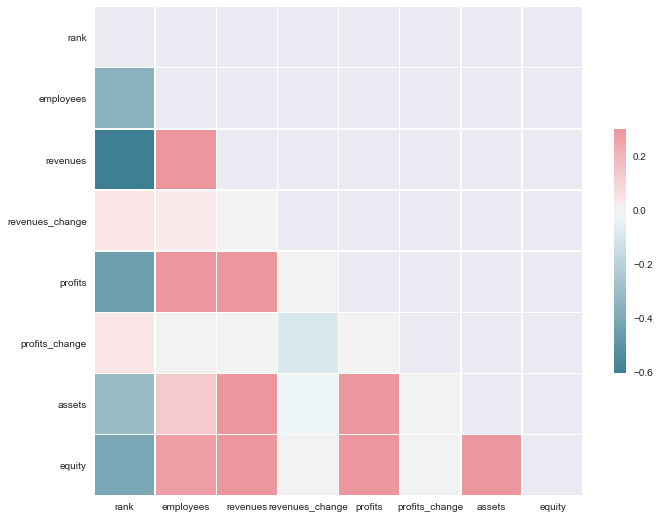

In [14]:
#half a heatmap

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

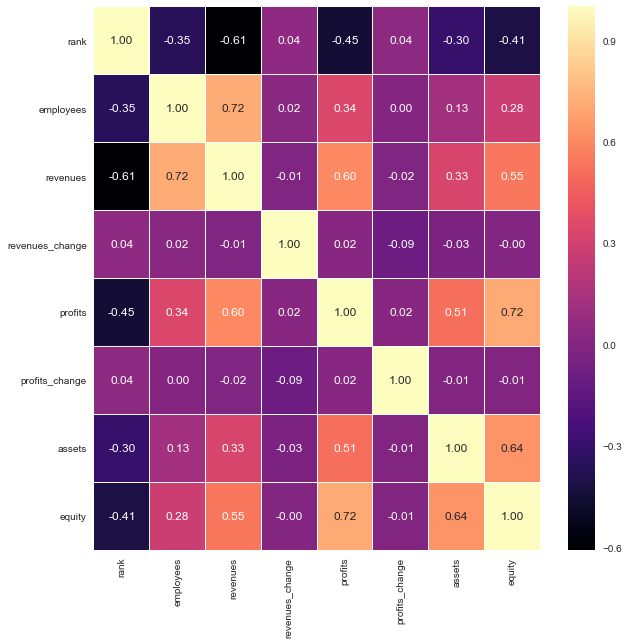

In [16]:
# full heat map with correlations

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

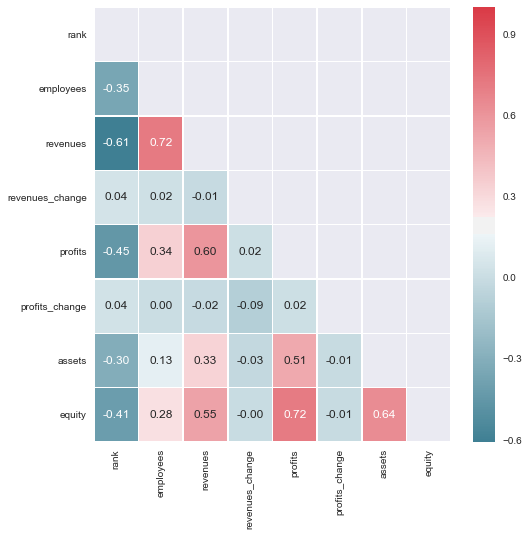

In [26]:
#half correlation table with correlations (use this one)

corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

### Exploring distributions

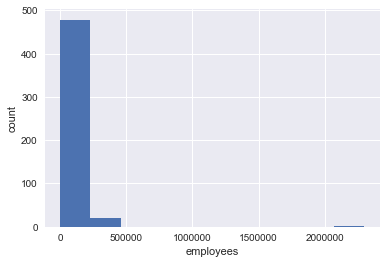

In [8]:
# Plot histogram of employees
hist_e = plt.hist(df['employees'])

# Label axes
hist_e = plt.xlabel('employees')
hist_e = plt.ylabel('count')

# Show histogram
plt.show()



### finding the appropriate number of bins, otherwise, default, 10 bins

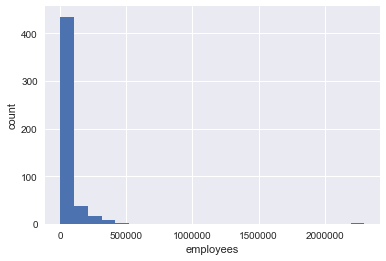

In [4]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(df)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(df['employees'], bins=n_bins)

# Label axes
_ = plt.xlabel('employees')
_ = plt.ylabel('count')

# Show histogram
plt.show()


### making a bee swarm plot

* Leland Wilkinson. In summary, “beeswarm” plots are not recommended as they often create visual artifacts that distracts from the estimated density of the observations.

From: https://www.r-statistics.com/2011/03/beeswarm-boxplot-and-plotting-it-with-r/

In [6]:
# subsetting the list of industries for a bee swarm plot

#To select rows whose column value is in list 
lim_industry = ['Financials', 'Energy', 'Retailing', 'Technology', 'Healthcare']
df1 = df[df.sector.isin(lim_industry)]

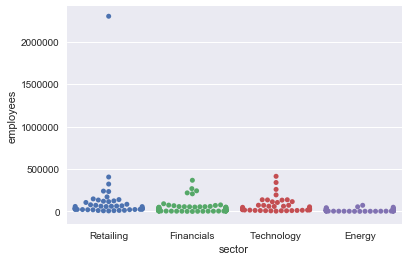

In [7]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='sector', y='employees', data=df1)

# Label the axes
_ = plt.xlabel('sector')
_ = plt.ylabel('employees')

# Show the plot
plt.show()


### ECDF

* In statistics, an empirical distribution function is the distribution function associated with the empirical measure of a sample. This cumulative distribution function is a step function that jumps up by 1/n at each of the n data points. Its value at any specified value of the measured variable is the fraction of observations of the measured variable that are less than or equal to the specified value. - Wikipedia

In [19]:
#building a function to calculate ECDF

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


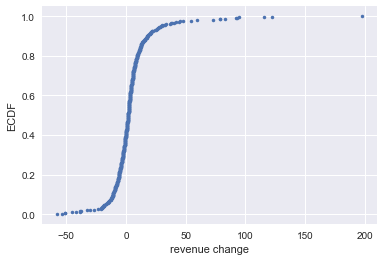

In [23]:
# Compute ECDF for a variable
x_vers, y_vers = ecdf(np.array(df['revenues_change']))

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('revenue change')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()


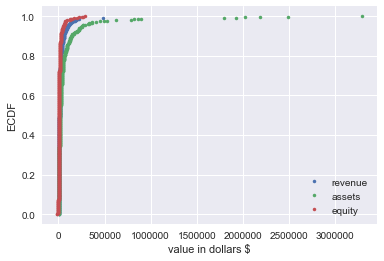

In [25]:
#multiple ECDFs in one chart

# Compute ECDFs
x_rev, y_rev = ecdf(np.array(df['revenues']))
x_sets, y_sets = ecdf(np.array(df['assets']))
x_eq, y_eq = ecdf(np.array(df['equity']))

# Plot all ECDFs on the same plot
_ = plt.plot(x_rev, y_rev, marker='.', linestyle='none')
_ = plt.plot(x_sets, y_sets, marker='.', linestyle='none')
_ = plt.plot(x_eq, y_eq, marker='.', linestyle='none')

# Annotate the plot
_ = plt.legend(('revenue', 'assets', 'equity'), loc='lower right')
_ = plt.xlabel('value in dollars $')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

#### Takeaways: 

* The Fortune 500 companies generally follow the ECDF distribution. However, it is clear that there are quite a few outliers that are high in asset value and revenue change, meaning some of the companies in the Fortune 500 may have moved in because they have high growth